# **Linking to Google Drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Importing Libraries and Reading the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
hd = pd.read_csv('/heart.csv')

# **Data inspection**

In [ ]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#!pip install ydata_profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(hd)
#profile.to_file("heart_diseases.html")

# **Dropping Duplicates**

In [ ]:
print("Number of duplicate rows:",hd.duplicated().sum())

Number of duplicate rows: 723


In [ ]:
hd = hd.drop_duplicates().reset_index(drop=True)

In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# **Handling Invalid Values in 'thal' column**

In [ ]:
hd['thal'].replace(0,hd['thal'].mode()[0],inplace=True)

/tmp/ipython-input-425546127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hd['thal'].replace(0,hd['thal'].mode()[0],inplace=True)


In [ ]:
(hd['thal'] == 0).sum()

np.int64(0)

In [ ]:
(hd['oldpeak'] == 0).sum()

np.int64(98)

# **Data Visualization**
   **Histogram Distributions**

In [ ]:
hd.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 0.995, 1], numeric_only=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0.000,29.00,0.0,0.0,94.00,126.00,0.0,0.00,71.000,0.0,0.000,0.0,0.00,1.0,0.0
0.100,42.00,0.0,0.0,110.00,188.40,0.0,0.00,116.000,0.0,0.000,1.0,0.00,2.0,0.0
0.250,48.00,0.0,0.0,120.00,211.00,0.0,0.00,133.250,0.0,0.000,1.0,0.00,2.0,0.0
0.900,66.00,1.0,2.0,152.00,308.90,1.0,1.00,176.800,1.0,2.800,2.0,2.00,3.0,1.0
0.950,68.00,1.0,3.0,160.00,326.95,1.0,1.00,181.950,1.0,3.400,2.0,3.00,3.0,1.0
0.990,71.00,1.0,3.0,180.00,406.87,1.0,1.99,191.980,1.0,4.200,2.0,3.99,3.0,1.0
0.995,74.99,1.0,3.0,185.94,412.96,1.0,2.00,194.495,1.0,4.994,2.0,4.00,3.0,1.0
1.000,77.00,1.0,3.0,200.00,564.00,1.0,2.00,202.000,1.0,6.200,2.0,4.00,3.0,1.0


In [ ]:
hd = hd[hd.chol<hd.chol.quantile(0.995)]
hd = hd[hd.oldpeak<hd.oldpeak.quantile(0.995)]

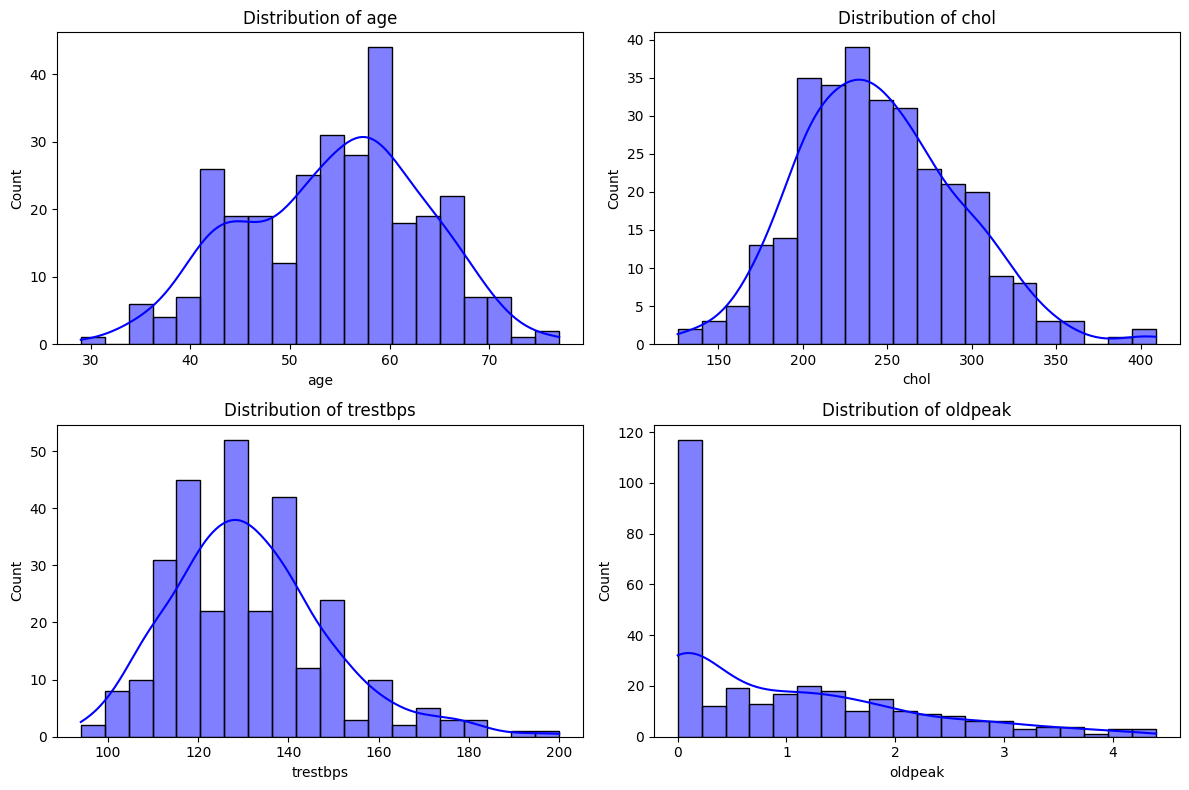

In [ ]:
features=['age','chol','trestbps','oldpeak']
plt.figure(figsize=(12,8))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(hd[col],bins=20,kde=True,color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Heatmap to show Correlation**

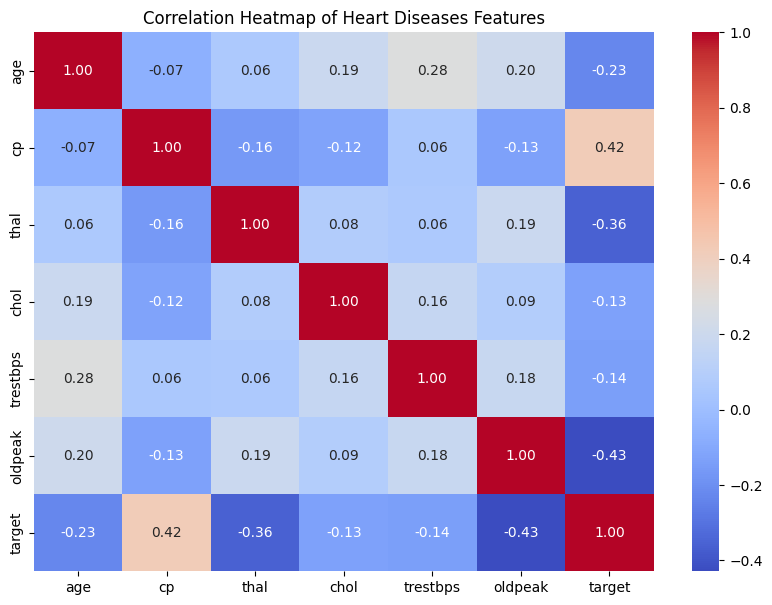

In [ ]:
features=['age', 'cp', 'thal','chol','trestbps','oldpeak', 'target']
plt.figure(figsize=(10,7))
sns.heatmap(hd[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Heart Diseases Features")
plt.show()

**Boxplots for features vs target**

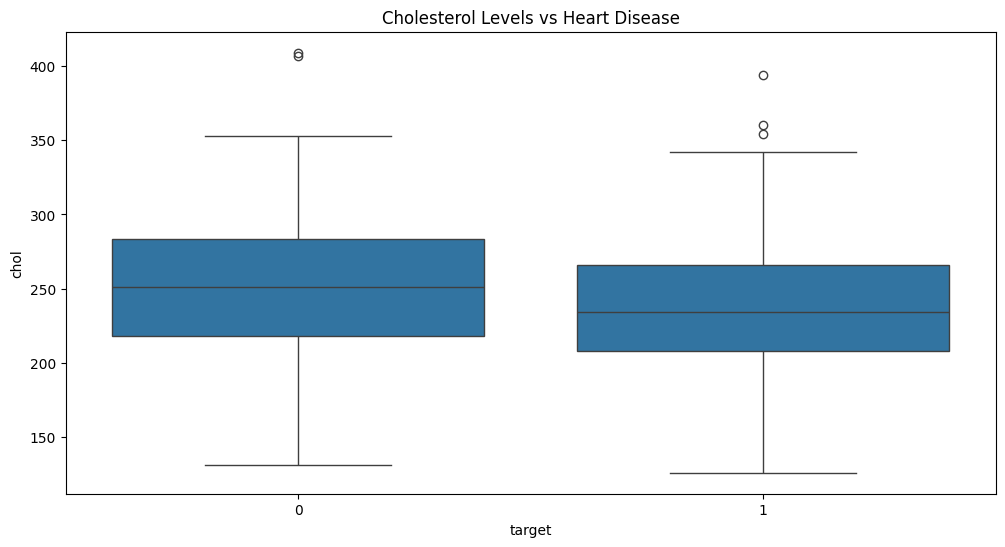

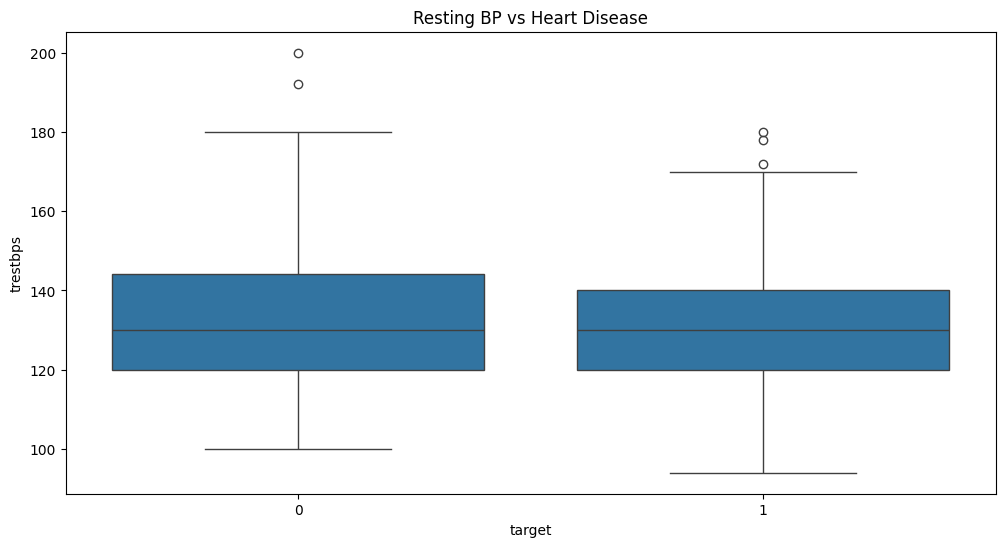

In [ ]:
#this is for 'chol'
plt.figure(figsize=(12,6))
sns.boxplot(x="target", y="chol", data=hd)
plt.title("Cholesterol Levels vs Heart Disease")
plt.show()


#this is for 'trestbps'
plt.figure(figsize=(12,6))
sns.boxplot(x="target", y="trestbps", data=hd)
plt.title("Resting BP vs Heart Disease")
plt.show()

**Target Distribution**

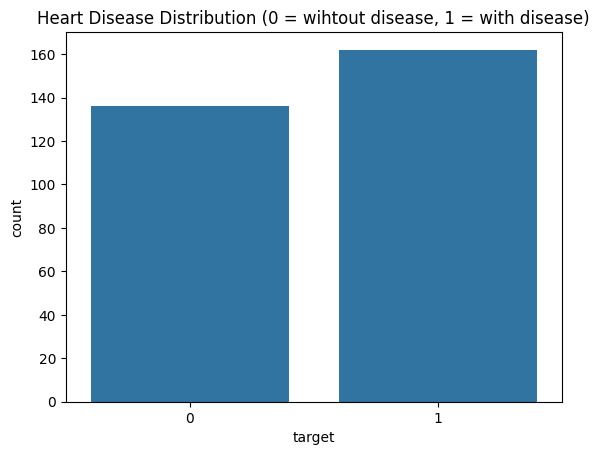

In [ ]:
sns.countplot(x='target', data=hd)
plt.title("Heart Disease Distribution (0 = wihtout disease, 1 = with disease)")
plt.show()

In [ ]:
print(hd.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


#**Data Encoding**

In [ ]:
hd_encoded=pd.get_dummies(hd,columns=['cp','restecg','slope','thal'],drop_first=True)


print(hd_encoded.head())
print("\nBefore Encoding:" , hd.shape)
print("\nAfter Encoding:" , hd_encoded.shape)

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target   cp_1  \
0   52    1       125   212    0      168      0      1.0   2       0  False   
1   53    1       140   203    1      155      1      3.1   0       0  False   
2   70    1       145   174    0      125      1      2.6   0       0  False   
3   61    1       148   203    0      161      0      0.0   1       0  False   
4   62    0       138   294    1      106      0      1.9   3       0  False   

    cp_2   cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_2  thal_3  
0  False  False       True      False    False     True   False    True  
1  False  False      False      False    False    False   False    True  
2  False  False       True      False    False    False   False    True  
3  False  False       True      False    False     True   False    True  
4  False  False       True      False     True    False    True   False  

Before Encoding: (298, 14)

After Encoding: (298, 19)


#**Scaling Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols=['age','trestbps','chol','thalach','oldpeak']

scaler = StandardScaler()
hd_encoded[num_cols] = scaler.fit_transform(hd_encoded[num_cols])

print(hd_encoded[num_cols].describe().T)

          count          mean       std       min       25%       50%  \
age       298.0 -2.324762e-16  1.001682 -2.802838 -0.782261  0.075793   
trestbps  298.0  6.676240e-16  1.001682 -2.139003 -0.656226 -0.085928   
chol      298.0  1.698865e-16  1.001682 -2.518127 -0.723059 -0.100065   
thalach   298.0  3.367925e-16  1.001682 -3.435268 -0.716469  0.124285   
oldpeak   298.0 -2.324762e-16  1.001682 -0.920967 -0.920967 -0.236671   

               75%       max  
age       0.740092  2.511557  
trestbps  0.484371  3.906163  
chol      0.607403  3.458394  
thalach   0.713904  2.286222  
oldpeak   0.538864  3.093568  


In [ ]:
print("Means:", np.mean(hd_encoded[num_cols], axis=0))
print("\n\nStds :", np.std(hd_encoded[num_cols], axis=0, ddof=0))

Means: age        -2.324762e-16
trestbps    6.676240e-16
chol        1.698865e-16
thalach     3.367925e-16
oldpeak    -2.324762e-16
dtype: float64


Stds : age         1.0
trestbps    1.0
chol        1.0
thalach     1.0
oldpeak     1.0
dtype: float64


#**Saving data**

In [ ]:
hd_encoded.to_csv("/content/drive/MyDrive/Heart Disease Risks Project/data/heart_cleaned.csv", index=False)